<a href="https://colab.research.google.com/github/AishaniD078/huds_ms_airband_analysis_2_repo/blob/main/HUDS_Research_Skeleton_Notebook_Aishani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Question

#### How does the availability of both fixed and mobile broadband technologies affect broadband speeds in underserved regions of the U.S.?

#### This question is:

* Specific: Focuses specifically on the effect of the availibilty of broadband technologies.

* Researchable: There is information on the broadband in different areas as well as the speeds. This gives us information on how the regions correlate to the speeds of broadband in those regions.

* Feasible: This is a simple question based on social justice while also connecting with the information provided for the fixed and mobile broadbands.

* Interesting: This is interesting to us because it is important to think about how accesibilty impacts how well broadband technology in undeserving areas.


# Problem Statement

Different areas have different access to high speed data which causes the speeds of broadbands to be worse. Certain areas may have this because of distance from cell towers and lower population density. This causes broadband services to not be provided to these areas as well as others, causing internet speeds to be slower. Overall, the availability of fixed and mobile broadband cause network speeds to be worse, especially in underserved regions.

### Import libraries

In [ ]:
# Import the libraries
import numpy as np                  # Scientific Computing
import pandas as pd                 # Data Analysis
%matplotlib inline
import matplotlib.pyplot as plt     # Plotting
import seaborn as sns               # Statistical Data Visualization
import zipfile
import os

# Let's make sure pandas returns all the rows and columns for the dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Force pandas to display full numbers instead of scientific notation
# pd.options.display.float_format = '{:.0f}'.format

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [ ]:
zip_paths = [
    '/content/bdc_us_fixed_broadband_summary_by_geography_D24_10jun2025.zip',
    '/content/bdc_us_mobile_broadband_summary_by_geography_D24_10jun2025.zip',
    '/content/bdc_us_provider_summary_by_geography_D24_10jun2025.zip'
]

for zip_path in zip_paths:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        print(f"Contents of {zip_path.split('/')[-1]}:")
        print(zip_ref.namelist())
        print()

extract_dir = '/content'

# Each tuple: (zip file path, original filename inside zip, new desired filename)
files_info = [
    (
        '/content/bdc_us_fixed_broadband_summary_by_geography_D24_10jun2025.zip',
        'bdc_us_fixed_broadband_summary_by_geography_D24_10jun2025.csv',
        'fixed_broadband.csv'  # new name for fixed
    ),
    (
        '/content/bdc_us_mobile_broadband_summary_by_geography_D24_10jun2025.zip',
        'bdc_us_mobile_broadband_summary_by_geography_D24_10jun2025.csv',
        'mobile_broadband.csv'  # new name for mobile
    ),
    (   '/content/bdc_us_provider_summary_by_geography_D24_10jun2025.zip',
        'bdc_us_provider_summary_by_geography_D24_10jun2025.csv',
        'provider_summary.csv' # new name for provider
    )
]

for zip_path, old_filename, new_filename in files_info:
    # Extract files
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

    # Rename the extracted file
    old_path = os.path.join(extract_dir, old_filename)
    new_path = os.path.join(extract_dir, new_filename)
    os.rename(old_path, new_path)


Contents of bdc_us_fixed_broadband_summary_by_geography_D24_10jun2025.zip:
['bdc_us_fixed_broadband_summary_by_geography_D24_10jun2025.csv']

Contents of bdc_us_mobile_broadband_summary_by_geography_D24_10jun2025.zip:
['bdc_us_mobile_broadband_summary_by_geography_D24_10jun2025.csv']

Contents of bdc_us_provider_summary_by_geography_D24_10jun2025.zip:
['bdc_us_provider_summary_by_geography_D24_10jun2025.csv']



In [ ]:
# Read the dataset
fixed_bb = pd.read_csv('fixed_broadband.csv')
mobile_bb = pd.read_csv('mobile_broadband.csv')
provider_summary = pd.read_csv('provider_summary.csv')

# Create the Dataframe
# DataFrameName = pd.DataFrame(path)

#### Understanding the Dataset
- Checking first elements of the DataFrame with .head( ) method
- After you run the code above, nothing will appear.
- So you have to write df to see your data. But instead of seeing all the data, we are going to use the “.head( )” method to see the first five elements of the data.
- Before you run the read_csv code, you can write df.head( ) below. So it’s going to be like this:

Inside the parentheses, we can write the number of elements that we want to see.
If we leave it blank, it will show the first five elements.
If we write 7 inside of the parentheses, it will show the first 7 elements of the dataframe.

In [ ]:
# Display the first ten rows of the dataframe
# Syntax: DataFrame.head(qty)

print("Fixed Broadband Data (first 7 rows):")
print(fixed_bb.head(7))
print("\nMobile Broadband Data (first 7 rows):")
print(mobile_bb.head(7))
print("\nProvider Summary Data (first 7 rows):")
print(provider_summary.head(7))

Fixed Broadband Data (first 7 rows):
  area_data_type geography_type geography_id geography_desc  \
0          Total       National           99       National   
1          Total       National           99       National   
2          Total       National           99       National   
3          Total       National           99       National   
4          Total       National           99       National   
5          Total       National           99       National   
6          Total       National           99       National   

  geography_desc_full  total_units biz_res  \
0            National    164620769       R   
1            National    164620769       B   
2            National    164620769       R   
3            National    164620769       B   
4            National    164620769       R   
5            National    164620769       B   
6            National    164620769       R   

                              technology  speed_02_02  speed_10_1  speed_25_3  \
0       

Checking last elements of the DataFrame with .tail() method
There is also a method to see the see last n number of elements.
The method is called .tail().
The same rule is also applied here. If we leave the parentheses blank, it will be set as 5, if we write 7 inside of the parentheses, it will show the last 7 elements of the dataframe.

In [ ]:
# Display the last ten rows of the dataframe
# Syntax: DataFrame.tail(qty)

print("Fixed Broadband Data (last 7 rows):")
print(fixed_bb.tail(7))
print("\nMobile Broadband Data (last 7 rows):")
print(mobile_bb.tail(7))
print("\nProvider Summary Data (last 7 rows):")
print(provider_summary.tail(7))

Fixed Broadband Data (last 7 rows):
       area_data_type geography_type geography_id geography_desc  \
623933          Rural     CBSA (MSA)        49820     Zapata, TX   
623934          Rural     CBSA (MSA)        49820     Zapata, TX   
623935          Rural     CBSA (MSA)        49820     Zapata, TX   
623936          Rural     CBSA (MSA)        49820     Zapata, TX   
623937          Rural     CBSA (MSA)        49820     Zapata, TX   
623938          Rural     CBSA (MSA)        49820     Zapata, TX   
623939          Rural     CBSA (MSA)        49820     Zapata, TX   

       geography_desc_full  total_units biz_res                 technology  \
623933          Zapata, TX         2642       B         All Fixed Wireless   
623934          Zapata, TX         2642       R  Unlicensed Fixed Wireless   
623935          Zapata, TX         2642       B  Unlicensed Fixed Wireless   
623936          Zapata, TX         2642       R    Licensed Fixed Wireless   
623937          Zapata, TX   

In [ ]:
# display the dimensions of the data
# This is the number of rows and columns in the data
# Syntax: DataFrame.shape

fixed_bb.shape, mobile_bb.shape, provider_summary.shape

((623940, 14), (21018, 13), (514217, 7))

* State the shape of the dataframe :
  - How many rows does the dataframe have?
  - How many columns does the dataframe have?
  - What is the total number of datapoints expected in the dataset (rows x columns)?

In [ ]:
print(f"The number of missing values in Fixed Broadband Dataframe is: ", fixed_bb.isnull().sum().sum()),
print(f"The number of missing values in Mobile Broadband Dataframe is: ", mobile_bb.isnull().sum().sum()),
print(f"The number of missing values in Provider Summary Dataframe is: ", provider_summary.isnull().sum().sum())

The number of missing values in Fixed Broadband Dataframe is:  0
The number of missing values in Mobile Broadband Dataframe is:  0
The number of missing values in Provider Summary Dataframe is:  0


In [ ]:
# Get shape information
fixed_rows, fixed_cols = fixed_bb.shape
fixed_total = fixed_rows * fixed_cols

mobile_rows, mobile_cols = mobile_bb.shape
mobile_total = mobile_rows * mobile_cols

provider_rows, provider_cols = provider_summary.shape
provider_total = provider_rows * provider_cols

# Print the result
print(f"The `Fixed Broadband` dataframe contains {fixed_rows} rows and {fixed_cols} columns, total number is {fixed_total}.")
print(f"The `Mobile Broadband` dataframe contains {mobile_rows} rows and {mobile_cols} columns, total number is {mobile_total}")
print(f"The `Provider Summary` dataframe contains {provider_rows} rows and {provider_cols} columns, total number is {provider_total}.")

The `Fixed Broadband` dataframe contains 623940 rows and 14 columns, total number is 8735160.
The `Mobile Broadband` dataframe contains 21018 rows and 13 columns, total number is 273234
The `Provider Summary` dataframe contains 514217 rows and 7 columns, total number is 3599519.


### Data Types
* The main data types in Pandas dataframes are `object`, `float`, `int64`, `bool` and `datetime64`. In order to understand each attribute of the data, it is always good to know the data type of each column.

##### `.info()` method
* This method prints information about a DataFrame including the index `dtype` and column dtypes, non-null values and memory usage.

In [ ]:
# Let's check the basic information about the dataset
# Syntax: DataFrame.info()

print("Data types in Fixed Broadband Data: ")
fixed_bb.info()
print("Data types in Mobile Broadband Data: ")
mobile_bb.info()
print("Data types in Provider Summary Data: ")
provider_summary.info()

Data types in Fixed Broadband Data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623940 entries, 0 to 623939
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   area_data_type       623940 non-null  object 
 1   geography_type       623940 non-null  object 
 2   geography_id         623940 non-null  object 
 3   geography_desc       623940 non-null  object 
 4   geography_desc_full  623940 non-null  object 
 5   total_units          623940 non-null  int64  
 6   biz_res              623940 non-null  object 
 7   technology           623940 non-null  object 
 8   speed_02_02          623940 non-null  float64
 9   speed_10_1           623940 non-null  float64
 10  speed_25_3           623940 non-null  float64
 11  speed_100_20         623940 non-null  float64
 12  speed_250_25         623940 non-null  float64
 13  speed_1000_100       623940 non-null  float64
dtypes: float64(6), int64(1), object

### Observations of the Data Set
Describe the dataset. How many rows and columns are there? What are the data types? Based on the number of expected data points, and those listed by the `.info()` method, how many missing (null) values are there?

The number of non-null values does not match the total number expected based on the number of rows in the dataframe. This indicates the presence of missing values that will need further investigation.



### Fixed Broadband

- **Rows:** 623,940  
- **Columns:** 14  
- **Data Types:**  
  - 7 columns are `object`  
  - 6 columns are `float64`  
  - 1 column is `int64`  
- **Missing values:**  
  - All columns report 623,940 non-null entries, which matches the total number of rows.  
  - Therefore, no missing values are present.

### Mobile Broadband

- **Rows:** 21018
- **Columns:** 13
- **Data Types:**  
  - 4 columns are `object`  
  - 9 columns are `float64`  
- **Missing values:**  
  - All columns report 21018 non-null entries, which matches the total number of rows.  
  - Therefore, no missing values are present.

### Provider Summary

- **Rows:** 514217
- **Columns:** 7
- **Data Types:**  
  - 4 columns are `object`  
  - 2 columns are `float64`
  - 1 column is `int64`  
- **Missing values:**  
  - All columns report 514217 non-null entries, which matches the total number of rows.  
  - Therefore, no missing values are present.

In [ ]:
new_fixed_bb = fixed_bb[['area_data_type','total_units', 'speed_02_02', 'speed_10_1', 'speed_25_3', 'speed_100_20', 'speed_250_25', 'speed_1000_100']].copy()
new_fixed_bb.head()

area_data_type  total_units  speed_02_02  speed_10_1  speed_25_3  \
0          Total    164620769     1.000000    1.000000    1.000000   
1          Total    164620769     1.000000    1.000000    1.000000   
2          Total    164620769     0.942141    0.931779    0.918651   
3          Total    164620769     0.829826    0.801551    0.775540   
4          Total    164620769     0.978991    0.971951    0.964834   

   speed_100_20  speed_250_25  speed_1000_100  
0      0.999915      0.913689        0.591365  
1      0.993139      0.746884        0.501676  
2      0.908110      0.898847        0.583388  
3      0.728392      0.712035        0.484683  
4      0.945304      0.913689        0.591365

In [ ]:
new_mobile_bb = mobile_bb[['area_data_type', 'mobilebb_3g_area_st_pct', 'mobilebb_3g_area_iv_pct', 'mobilebb_4g_area_st_pct', 'mobilebb_4g_area_iv_pct', 'mobilebb_5g_spd1_area_st_pct', 'mobilebb_5g_spd1_area_iv_pct', 'mobilebb_5g_spd2_area_st_pct', 'mobilebb_5g_spd2_area_iv_pct']].copy()
new_mobile_bb.head()

area_data_type  mobilebb_3g_area_st_pct  mobilebb_3g_area_iv_pct  \
0          Total                 0.061412                 0.042772   
1          Total                 0.000000                 0.000000   
2          Total                 0.081332                 0.053745   
3          Total                 0.070936                 0.047557   
4          Total                 0.000000                 0.000000   

   mobilebb_4g_area_st_pct  mobilebb_4g_area_iv_pct  \
0                 0.687893                 0.458448   
1                 0.946387                 0.636515   
2                 0.074291                 0.031995   
3                 0.725504                 0.338257   
4                 0.909323                 0.522770   

   mobilebb_5g_spd1_area_st_pct  mobilebb_5g_spd1_area_iv_pct  \
0                      0.480004                      0.248525   
1                      0.619221                      0.301340   
2                      0.017289                      0.006168   
3                      0.390342                      0.173772   
4                      0.652989                      0.312045   

   mobilebb_5g_spd2_area_st_pct  mobilebb_5g_spd2_area_iv_pct  
0                      0.371785                      0.170598  
1                      0.453410                      0.225019  
2                      0.008915                      0.003235  
3                      0.311632                      0.117986  
4                      0.464339                      0.220165

In [ ]:
# Mapping new feature to new_fixed_bb
fixed_broadband_status = []

for index, row in new_fixed_bb.iterrows():
    # Check if the percentage of broadband speeds is less than 50%
    if row['speed_25_3'] < 0.50 :
        fixed_broadband_status.append('Underserved')
    else:
        fixed_broadband_status.append('Served')

# Add the new 'region_status' column to new_fixed_bb
new_fixed_bb['region_status'] = fixed_broadband_status

In [ ]:
new_fixed_bb.head()

area_data_type  total_units  speed_02_02  speed_10_1  speed_25_3  \
0          Total    164620769     1.000000    1.000000    1.000000   
1          Total    164620769     1.000000    1.000000    1.000000   
2          Total    164620769     0.942141    0.931779    0.918651   
3          Total    164620769     0.829826    0.801551    0.775540   
4          Total    164620769     0.978991    0.971951    0.964834   

   speed_100_20  speed_250_25  speed_1000_100 region_status  
0      0.999915      0.913689        0.591365        Served  
1      0.993139      0.746884        0.501676        Served  
2      0.908110      0.898847        0.583388        Served  
3      0.728392      0.712035        0.484683        Served  
4      0.945304      0.913689        0.591365        Served

In [ ]:
new_fixed_bb['region_status'].value_counts()

region_status
Served         402545
Underserved    221395
Name: count, dtype: int64

### Summary Statistics

In [ ]:
new_fixed_bb.describe()

total_units    speed_02_02     speed_10_1     speed_25_3  \
count  6.239400e+05  623940.000000  623940.000000  623940.000000   
mean   1.174466e+05       0.682724       0.650933       0.630012   
std    1.894663e+06       0.378161       0.384968       0.395467   
min    1.000000e+00       0.000000       0.000000       0.000000   
25%    4.332000e+03       0.386914       0.303987       0.229282   
50%    1.320900e+04       0.886152       0.835642       0.806306   
75%    4.262800e+04       1.000000       1.000000       1.000000   
max    1.646208e+08       1.000000       1.000000       1.000000   

        speed_100_20   speed_250_25  speed_1000_100  
count  623940.000000  623940.000000   623940.000000  
mean        0.507730       0.299657        0.180103  
std         0.421444       0.381699        0.291874  
min         0.000000       0.000000        0.000000  
25%         0.000945       0.000000        0.000000  
50%         0.527915       0.000167        0.000000  
75%         0.985898       0.673684        0.305059  
max         1.000000       1.000000        1.000000

In [ ]:
new_mobile_bb.describe()

mobilebb_3g_area_st_pct  mobilebb_3g_area_iv_pct  \
count             21018.000000             21018.000000   
mean                  0.053035                 0.039227   
std                   0.194349                 0.157577   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                   1.000000                 1.000000   

       mobilebb_4g_area_st_pct  mobilebb_4g_area_iv_pct  \
count             21018.000000             21018.000000   
mean                  0.896380                 0.699465   
std                   0.204381                 0.269683   
min                   0.000000                 0.000000   
25%                   0.902591                 0.519793   
50%                   0.989849                 0.741811   
75%                   1.000000                 0.955017   
max                   1.000000                 1.000000   

       mobilebb_5g_spd1_area_st_pct  mobilebb_5g_spd1_area_iv_pct  \
count                  21018.000000                  21018.000000   
mean                       0.736536                      0.496170   
std                        0.280536                      0.322464   
min                        0.000000                      0.000000   
25%                        0.570093                      0.223778   
50%                        0.826214                      0.444444   
75%                        0.987752                      0.792229   
max                        1.000000                      1.000000   

       mobilebb_5g_spd2_area_st_pct  mobilebb_5g_spd2_area_iv_pct  
count                  21018.000000                  21018.000000  
mean                       0.620710                      0.384792  
std                        0.301191                      0.312329  
min                        0.000000                      0.000000  
25%                        0.395141                      0.127029  
50%                        0.641574                      0.286158  
75%                        0.916737                      0.614376  
max                        1.000000                      1.000000

### Correlation and observations

In [ ]:
fixed_corr = new_fixed_bb.select_dtypes(include='number').corr()

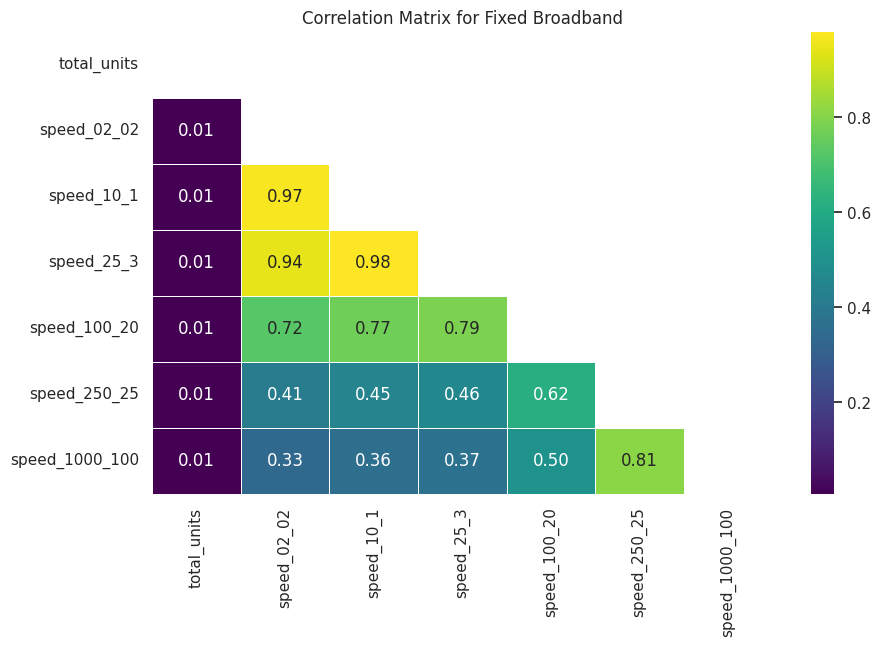

In [ ]:
# Set seaborn themes
sns.set_theme(style='white')
sns.color_palette('viridis', as_cmap=True)

# Create the plot
plt.figure(figsize=(10,6))
matrix = fixed_corr
mask = np.triu(np.ones_like(matrix, dtype=float))
sns.heatmap(fixed_corr,
           annot=True,
           linewidths=.5,
           cmap='viridis',
           fmt= '.2f',
           mask=mask)

# Specify the name of the plot
plt.title('Correlation Matrix for Fixed Broadband')
plt.show()

In [ ]:
# Mapping new feature to new_mobile_bb
mobile_broadband_status = []

for index, row in new_mobile_bb.iterrows():
    # Check if the percentage of mobile broadband coverage is less than 50%
    if row['mobilebb_4g_area_st_pct'] < 0.50:
        mobile_broadband_status.append('Underserved')
    else:
        mobile_broadband_status.append('Served')

# Add the new 'region_status' column to new_mobile_bb
new_mobile_bb['region_status'] = mobile_broadband_status

new_mobile_bb.head()

area_data_type  mobilebb_3g_area_st_pct  mobilebb_3g_area_iv_pct  \
0          Total                 0.061412                 0.042772   
1          Total                 0.000000                 0.000000   
2          Total                 0.081332                 0.053745   
3          Total                 0.070936                 0.047557   
4          Total                 0.000000                 0.000000   

   mobilebb_4g_area_st_pct  mobilebb_4g_area_iv_pct  \
0                 0.687893                 0.458448   
1                 0.946387                 0.636515   
2                 0.074291                 0.031995   
3                 0.725504                 0.338257   
4                 0.909323                 0.522770   

   mobilebb_5g_spd1_area_st_pct  mobilebb_5g_spd1_area_iv_pct  \
0                      0.480004                      0.248525   
1                      0.619221                      0.301340   
2                      0.017289                      0.006168   
3                      0.390342                      0.173772   
4                      0.652989                      0.312045   

   mobilebb_5g_spd2_area_st_pct  mobilebb_5g_spd2_area_iv_pct region_status  
0                      0.371785                      0.170598        Served  
1                      0.453410                      0.225019        Served  
2                      0.008915                      0.003235   Underserved  
3                      0.311632                      0.117986        Served  
4                      0.464339                      0.220165        Served

In [ ]:
new_mobile_bb.describe()

mobilebb_3g_area_st_pct  mobilebb_3g_area_iv_pct  \
count             21018.000000             21018.000000   
mean                  0.053035                 0.039227   
std                   0.194349                 0.157577   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                   1.000000                 1.000000   

       mobilebb_4g_area_st_pct  mobilebb_4g_area_iv_pct  \
count             21018.000000             21018.000000   
mean                  0.896380                 0.699465   
std                   0.204381                 0.269683   
min                   0.000000                 0.000000   
25%                   0.902591                 0.519793   
50%                   0.989849                 0.741811   
75%                   1.000000                 0.955017   
max                   1.000000                 1.000000   

       mobilebb_5g_spd1_area_st_pct  mobilebb_5g_spd1_area_iv_pct  \
count                  21018.000000                  21018.000000   
mean                       0.736536                      0.496170   
std                        0.280536                      0.322464   
min                        0.000000                      0.000000   
25%                        0.570093                      0.223778   
50%                        0.826214                      0.444444   
75%                        0.987752                      0.792229   
max                        1.000000                      1.000000   

       mobilebb_5g_spd2_area_st_pct  mobilebb_5g_spd2_area_iv_pct  
count                  21018.000000                  21018.000000  
mean                       0.620710                      0.384792  
std                        0.301191                      0.312329  
min                        0.000000                      0.000000  
25%                        0.395141                      0.127029  
50%                        0.641574                      0.286158  
75%                        0.916737                      0.614376  
max                        1.000000                      1.000000

In [ ]:
new_mobile_bb['region_status'].value_counts()

region_status
Served         19863
Underserved     1155
Name: count, dtype: int64

In [ ]:
mobile_corr = new_mobile_bb.select_dtypes(include='number').corr()

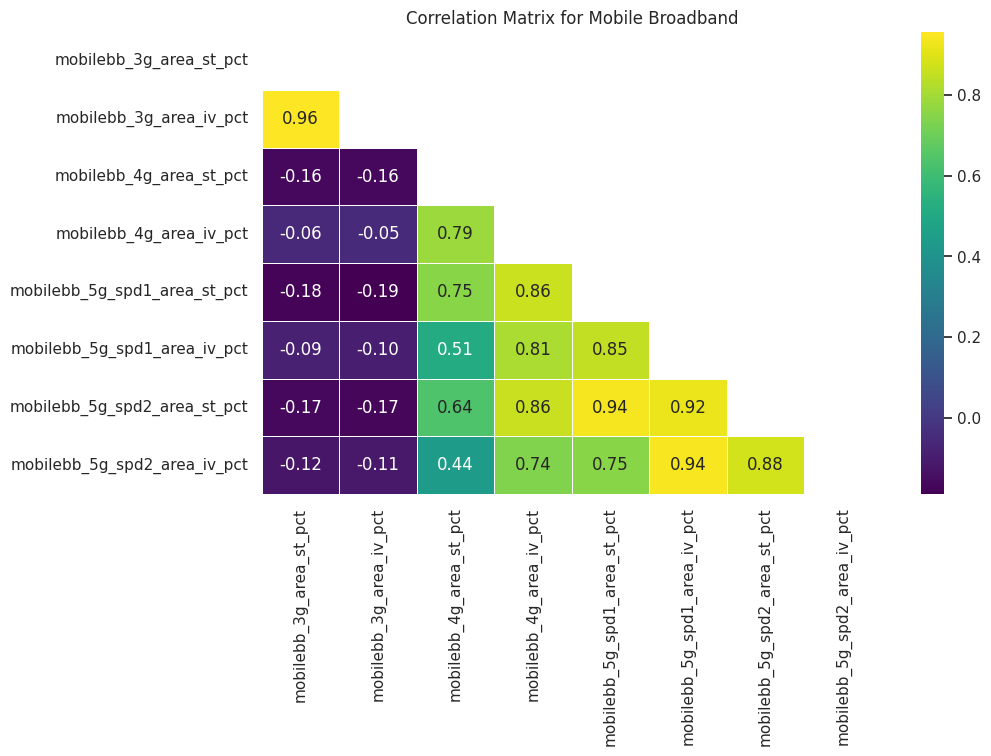

In [ ]:
# Set seaborn themes
sns.set_theme(style='white')
sns.color_palette('viridis', as_cmap=True)

# Create the plot
plt.figure(figsize=(10,6))
matrix = mobile_corr
mask = np.triu(np.ones_like(matrix, dtype=float))
sns.heatmap(mobile_corr,
           annot=True,
           linewidths=.5,
           cmap='viridis',
           fmt= '.2f',
           mask=mask)

# Specify the name of the plot
plt.title('Correlation Matrix for Mobile Broadband')
plt.show()

### Visualizations

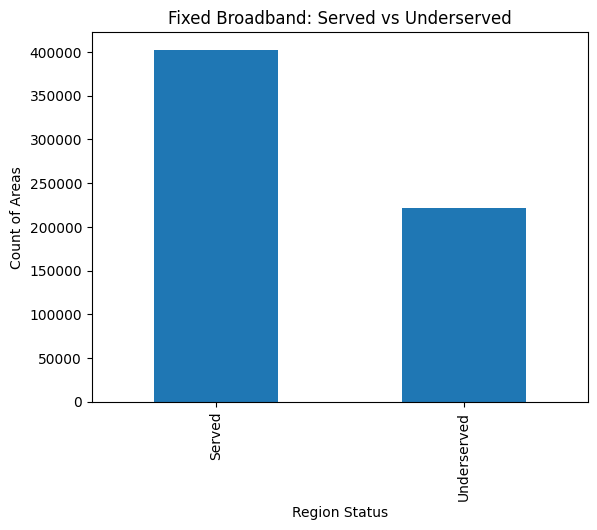

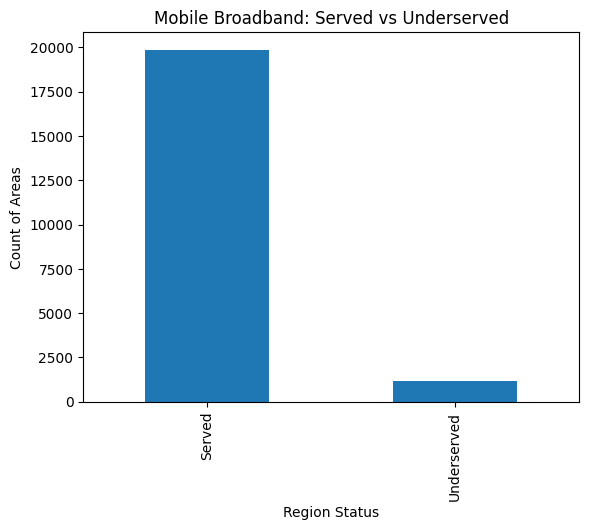

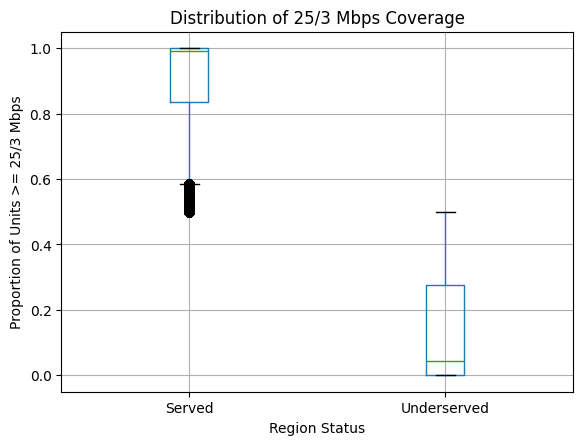

In [ ]:
# Visualization 1: Fixed broadband served vs underserved
fig, ax = plt.subplots()
new_fixed_bb['region_status'].value_counts().plot(kind='bar', ax=ax)
ax.set_xlabel('Region Status')
ax.set_ylabel('Count of Areas')
ax.set_title('Fixed Broadband: Served vs Underserved')
plt.show()

# Visualization 2: Mobile broadband served vs underserved
fig, ax = plt.subplots()
new_mobile_bb['region_status'].value_counts().plot(kind='bar', ax=ax)
ax.set_xlabel('Region Status')
ax.set_ylabel('Count of Areas')
ax.set_title('Mobile Broadband: Served vs Underserved')
plt.show()

# Visualization 3: Distribution of 25/3 Mbps coverage by region status
fig, ax = plt.subplots()
new_fixed_bb.boxplot(column='speed_25_3', by='region_status', ax=ax)
ax.set_xlabel('Region Status')
ax.set_ylabel('Proportion of Units >= 25/3 Mbps')
ax.set_title('Distribution of 25/3 Mbps Coverage')
plt.suptitle('')
plt.show()

#### Interpretations:

The first bar chart displays the number of areas classified as “Served” (where at least 50% of homes have access to good fixed broadband speeds) versus “Underserved” for fixed-line internet. The chart indicates that a high count of “Served” areas suggests fixed broadband has been widely deployed.

The second bar chart presents the same comparison—“Served” versus “Underserved”—but for 4G mobile coverage. The difference in bar heights highlights whether mobile broadband is effectively filling coverage gaps left by fixed networks, or whether it is also lacking, particularly in rural or low-density areas.

Finally, the boxplot shows the distribution of 25/3 Mbps coverage by region status. The narrow range of the “Served” category indicates consistently strong performance, while the wider spread in the “Underserved” category reflects a mix of situations—from nearly adequate coverage to very limited access. The clear gap between the two boxplots reinforces the relevance of the 50% cutoff: areas labeled “Served” not only meet this threshold but often exceed it substantially.

### If Continue Filtering by County

In [ ]:
# Filter to Rural/Tribal County
keep_types = ['Rural','Tribal']
fixed_county = fixed_bb[
    fixed_bb['area_data_type'].isin(keep_types) &
    (fixed_bb['geography_type'] == 'County')
]
mobile_county = mobile_bb[
    mobile_bb['area_data_type'].isin(keep_types) &
    (mobile_bb['geography_type'] == 'County')
]

# Differentiate by fixed-technology (e.g., Fiber vs Cable)
fixed_fiber_cable = fixed_county[
    fixed_county['technology'].isin(['Fiber','Cable'])
].copy()
# We can also inspect counts:
print("Fiber vs Cable counts:")
print(fixed_fiber_cable['technology'].value_counts(), "\n")

# Step 5: Zero in on key speed tiers
fixed_key = fixed_fiber_cable[[
    'geography_id','area_data_type','geography_desc',
    'technology','biz_res','total_units','speed_25_3'
]].copy()

mobile_key = mobile_county[[
    'geography_id','area_data_type','geography_desc',
    'mobilebb_5g_spd1_area_st_pct','mobilebb_5g_spd2_area_st_pct'
]].copy()

print("Fixed (25/3) sample:")
print(fixed_key.head(), "\n")
print("Mobile (5G speed tiers) sample:")
print(mobile_key.head())

Fiber vs Cable counts:
technology
Cable    7406
Fiber    7406
Name: count, dtype: int64 

Fixed (25/3) sample:
       geography_id area_data_type    geography_desc technology biz_res  \
188022        01031         Tribal     Coffee County      Cable       R   
188023        01031         Tribal     Coffee County      Cable       B   
188024        01031         Tribal     Coffee County      Fiber       R   
188025        01031         Tribal     Coffee County      Fiber       B   
188052        01039         Tribal  Covington County      Cable       R   

        total_units  speed_25_3  
188022        11748    0.415390  
188023        11748    0.160878  
188024        11748    0.853507  
188025        11748    0.846612  
188052          576    0.555556   

Mobile (5G speed tiers) sample:
     geography_id area_data_type      geography_desc  \
9311        01001          Rural  Autauga County, AL   
9312        01003          Rural  Baldwin County, AL   
9313        01005          Rural

In [ ]:
fixed_county.describe()

total_units    speed_02_02     speed_10_1     speed_25_3  \
count  111090.000000  111090.000000  111090.000000  111090.000000   
mean    10959.213881       0.648614       0.619469       0.599389   
std     11949.267557       0.377672       0.383427       0.391718   
min         1.000000       0.000000       0.000000       0.000000   
25%      3538.000000       0.320170       0.259542       0.201888   
50%      7872.000000       0.804565       0.746903       0.709370   
75%     14962.000000       1.000000       1.000000       1.000000   
max    335827.000000       1.000000       1.000000       1.000000   

        speed_100_20   speed_250_25  speed_1000_100  
count  111090.000000  111090.000000   111090.000000  
mean        0.473957       0.262736        0.168107  
std         0.411493       0.344658        0.282287  
min         0.000000       0.000000        0.000000  
25%         0.004192       0.000000        0.000000  
50%         0.434139       0.000157        0.000000  
75%         0.953035       0.549137        0.255587  
max         1.000000       1.000000        1.000000

In [ ]:
fixed_county.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111090 entries, 188010 to 583199
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   area_data_type       111090 non-null  object 
 1   geography_type       111090 non-null  object 
 2   geography_id         111090 non-null  object 
 3   geography_desc       111090 non-null  object 
 4   geography_desc_full  111090 non-null  object 
 5   total_units          111090 non-null  int64  
 6   biz_res              111090 non-null  object 
 7   technology           111090 non-null  object 
 8   speed_02_02          111090 non-null  float64
 9   speed_10_1           111090 non-null  float64
 10  speed_25_3           111090 non-null  float64
 11  speed_100_20         111090 non-null  float64
 12  speed_250_25         111090 non-null  float64
 13  speed_1000_100       111090 non-null  float64
dtypes: float64(6), int64(1), object(7)
memory usage: 12.7+ MB


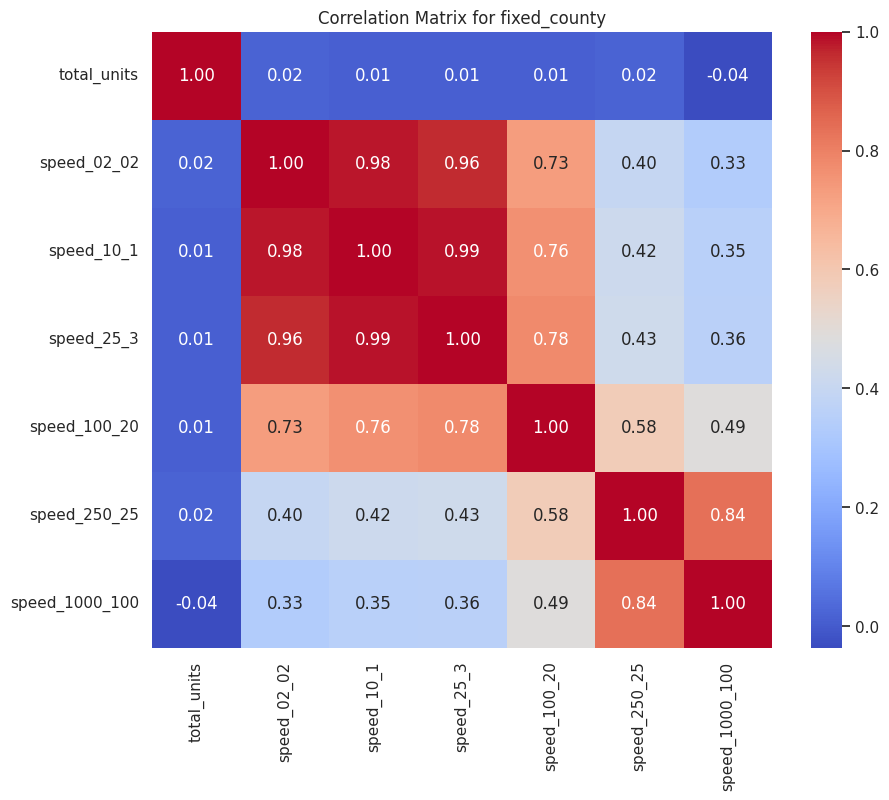

In [ ]:
fixed_county_corr = fixed_county.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))
sns.heatmap(fixed_county_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for fixed_county')
plt.show()

In [ ]:
mobile_county.describe()

total_area  mobilebb_3g_area_st_pct  mobilebb_3g_area_iv_pct  \
count    3749.000000              3749.000000              3749.000000   
mean     2656.868095                 0.044833                 0.029452   
std      9292.731723                 0.164883                 0.119334   
min         0.105332                 0.000000                 0.000000   
25%       919.552725                 0.000000                 0.000000   
50%      1469.915037                 0.000000                 0.000000   
75%      2219.987770                 0.000000                 0.000000   
max    396170.700380                 1.000000                 1.000000   

       mobilebb_4g_area_st_pct  mobilebb_4g_area_iv_pct  \
count              3749.000000              3749.000000   
mean                  0.888394                 0.626878   
std                   0.187178                 0.242417   
min                   0.000000                 0.000000   
25%                   0.866311                 0.459260   
50%                   0.976649                 0.644665   
75%                   0.998332                 0.825496   
max                   1.000000                 1.000000   

       mobilebb_5g_spd1_area_st_pct  mobilebb_5g_spd1_area_iv_pct  \
count                   3749.000000                   3749.000000   
mean                       0.675618                      0.370737   
std                        0.259553                      0.246375   
min                        0.000000                      0.000000   
25%                        0.500000                      0.174603   
50%                        0.723014                      0.331125   
75%                        0.900467                      0.532500   
max                        1.000000                      1.000000   

       mobilebb_5g_spd2_area_st_pct  mobilebb_5g_spd2_area_iv_pct  
count                   3749.000000                   3749.000000  
mean                       0.524455                      0.252589  
std                        0.256160                      0.208575  
min                        0.000000                      0.000000  
25%                        0.329712                      0.100164  
50%                        0.523138                      0.197783  
75%                        0.725667                      0.354133  
max                        1.000000                      1.000000

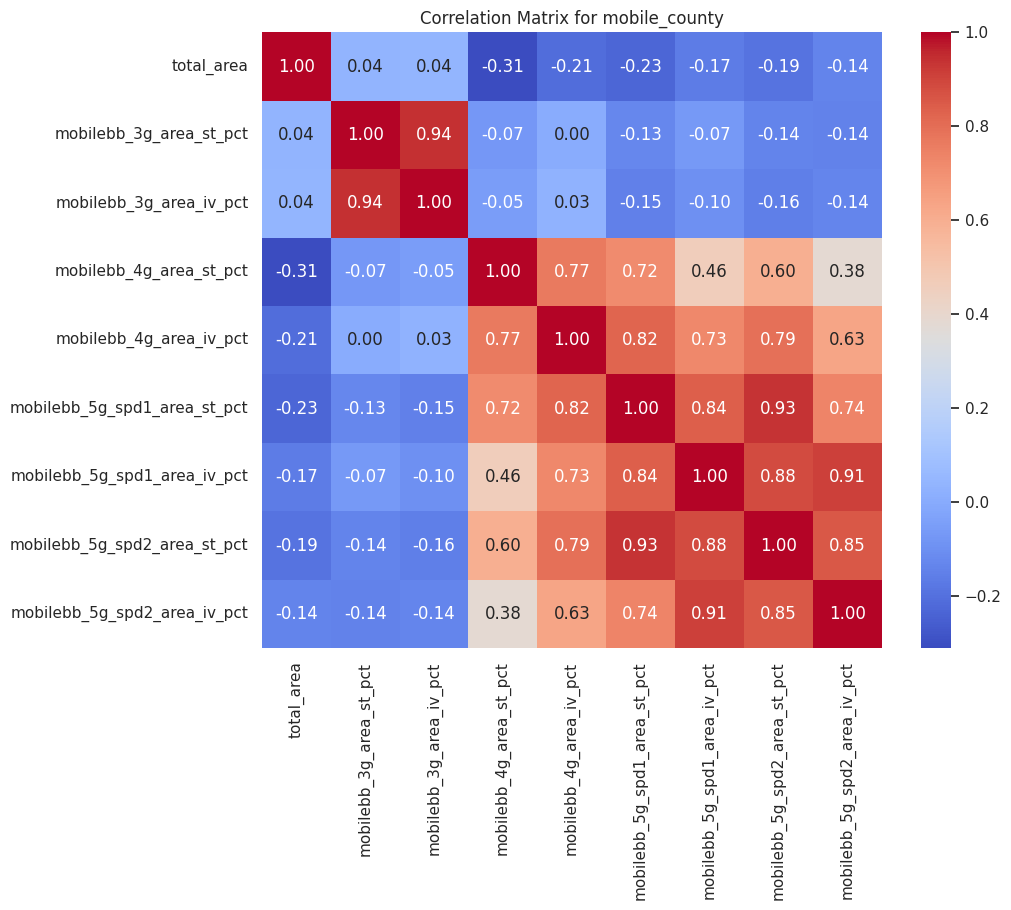

In [ ]:
mobile_county_corr = mobile_county.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))
sns.heatmap(mobile_county_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for mobile_county')
plt.show()

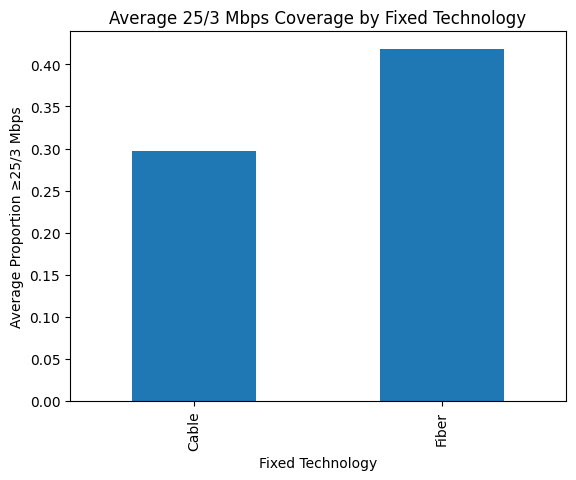

In [ ]:
# 1. Bar chart: mean speed_25_3 by fixed technology
mean_speeds = fixed_key.groupby('technology')['speed_25_3'].mean()
fig, ax = plt.subplots()
mean_speeds.plot(kind='bar', ax=ax)
ax.set_xlabel('Fixed Technology')
ax.set_ylabel('Average Proportion ≥25/3 Mbps')
ax.set_title('Average 25/3 Mbps Coverage by Fixed Technology')
plt.show()

In [ ]:
import plotly.express as px
import plotly.io as pio
pio.templates.default = 'plotly_white'

# Fixed broadband served vs underserved
fig_fixed = px.histogram(
    new_fixed_bb,
    x='region_status',
    title='Fixed Broadband: Served vs Underserved',
    labels={'region_status':'Region Status', 'count':'Number of Areas'}
)
fig_fixed.show()

# Mobile broadband served vs underserved
fig_mobile = px.histogram(
    new_mobile_bb,
    x='region_status',
    title='Mobile Broadband: Served vs Underserved',
    labels={'region_status':'Region Status', 'count':'Number of Areas'}
)
fig_mobile.show()

#### Interpretation:

Bar chart shown above shows the average fraction of addressable units with ≥ 25 Mbps down/3 Mbps up.

Based on the plot, we can see that Fiber generally delivers a higher mean coverage than Cable in these rural/tribal counties, indicating that where fiber is available, it almost always meets the FCC’s broadband threshold. On the other hand, Cable has a lower mean, suggesting that cable deployments in these areas are less uniformly built out to 25/3.

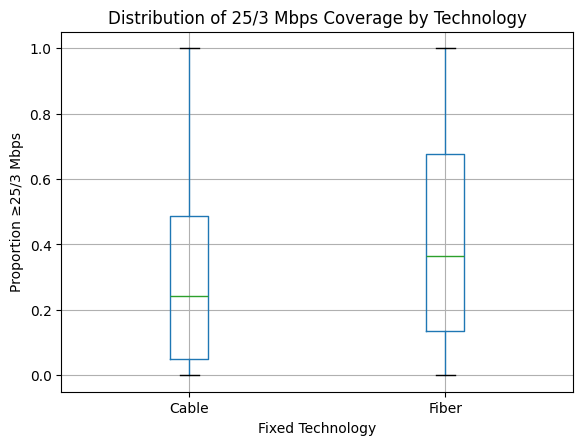

In [ ]:
# 2. Boxplot: distribution of speed_25_3 by technology
fig, ax = plt.subplots()
fixed_key.boxplot(column='speed_25_3', by='technology', ax=ax)
ax.set_xlabel('Fixed Technology')
ax.set_ylabel('Proportion ≥25/3 Mbps')
ax.set_title('Distribution of 25/3 Mbps Coverage by Technology')
plt.suptitle('')
plt.show()

#### Interpretation:

The boxplot shown above shows the distribution of coverage for Fiber vs Cable.

Based on the boxplot, we can see that Fiber’s median is near the top (often > 90%), with a tight IQR indicating most fiber-served geographies have uniformly excellent 25/3 coverage.

Cable’s box is wider and its median is lower, with more outliers at the bottom, signaling that some cable areas are very poorly provisioned. Thus, Cable rolls out unevenly, which indicates some places get great speeds, others barely meet 25/3—whereas fiber deployments are more consistent.



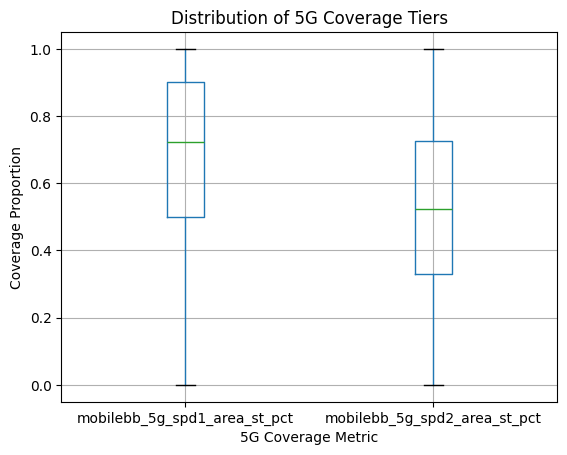

In [ ]:
# 3. Boxplots: mobile 5G tier coverage
plt.figure()
mobile_key[['mobilebb_5g_spd1_area_st_pct', 'mobilebb_5g_spd2_area_st_pct']].boxplot()
plt.xlabel('5G Coverage Metric')
plt.ylabel('Coverage Proportion')
plt.title('Distribution of 5G Coverage Tiers')
plt.show()

#### Interpretation:

The boxplots shown above shows the mobile 5G Tier 1 vs Tier 2 coverage, which Tier 1 (≥ 7 Mbps/1 Mbps) and Tier 2 (≥ 35 Mbps/3 Mbps)

Based on the boxplots, we can see that Tier 1 has a higher median and tighter spread. Most rural/tribal areas already have basic 5G coverage sufficient for light browsing. While, Tier 2, which is more demanding, has a lower median and wider IQR, which reflecting that many places lack high-performance 5G.

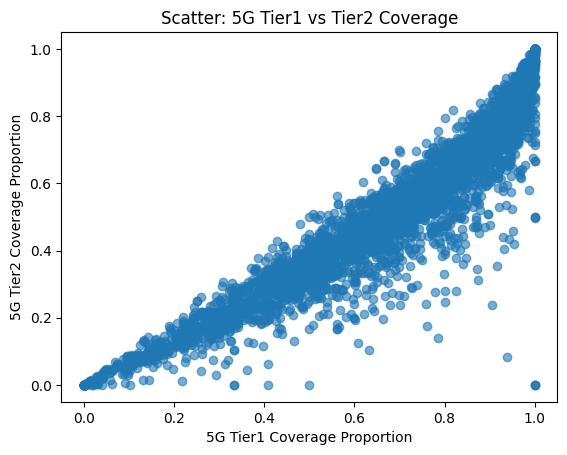

In [ ]:
# 4. Scatter: 5G tier1 vs tier2
plt.figure()
plt.scatter(
    mobile_key['mobilebb_5g_spd1_area_st_pct'],
    mobile_key['mobilebb_5g_spd2_area_st_pct'],
    alpha=0.6
)
plt.xlabel('5G Tier1 Coverage Proportion')
plt.ylabel('5G Tier2 Coverage Proportion')
plt.title('Scatter: 5G Tier1 vs Tier2 Coverage')
plt.show()

#### Interpretation:

The Scatter plot shown above shows the mobile 5G Tier 1 vs Tier 2 coverage. Each point represents a county.

Based on the plot, we can see that there is a strong positive correlation, which means that counties that invest in basic 5G often upgrade to higher speeds too. However, notice the cluster of points with high x, low y. Those have broad access to minimal 5G but little high-speed 5G. Therefore, simply having 5G does not guarantee premium performance.


### Necessary plot? ? ?

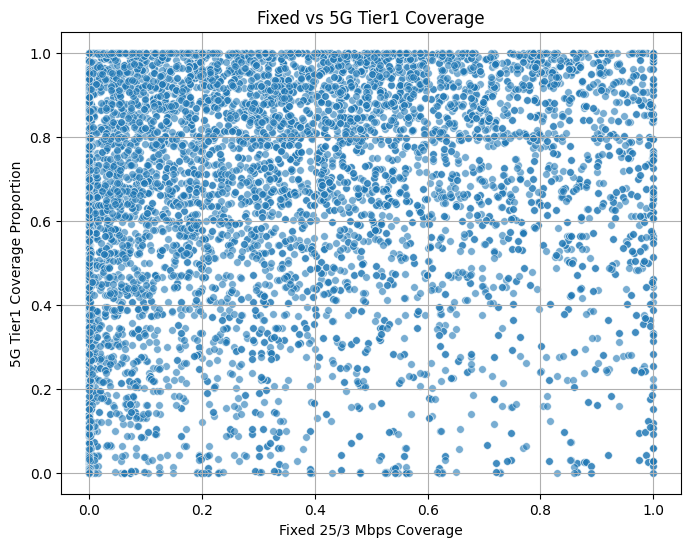

In [ ]:
# 5. Merge and scatter: fixed vs mobile coverage
merged = fixed_key[['geography_id','speed_25_3']].merge(
    mobile_key[['geography_id','mobilebb_5g_spd1_area_st_pct']],
    on='geography_id', how='inner'
)
# Enhanced scatter for better visibility
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(
    merged['speed_25_3'],
    merged['mobilebb_5g_spd1_area_st_pct'],
    s=30,       # larger markers
    alpha=0.6,  # semi-transparent
    edgecolors='w',  # white edge for contrast
    linewidth=0.5
)
ax.set_xlabel('Fixed 25/3 Mbps Coverage')
ax.set_ylabel('5G Tier1 Coverage Proportion')
ax.set_title('Fixed vs 5G Tier1 Coverage')
ax.grid(True)
plt.show()

